In [1]:
import numpy as np
import math

In [2]:
import pandas as pd

In [3]:
%cd C:\Users\praga\Downloads\PRML\Assign1
df=pd.read_csv('Dataset.csv',header = None)

C:\Users\praga\Downloads\PRML\Assign1


In [4]:
X=df.to_numpy()

In [5]:
X

array([[ 0.143  ,  0.98493],
       [-0.30467,  0.98562],
       [ 0.46625, -0.84003],
       ...,
       [ 6.1062 , -5.9864 ],
       [-7.4094 , -5.5205 ],
       [-0.12948, -8.8036 ]])

In [6]:
K=np.array([[0.0]*1000]*1000)#initialize K

In [7]:
def kernelfunc(a,b):#func for K
    d=3
    return (np.dot(a,b)+1)**d
#     (a[0]*b[0]+a[1]*b[1]+1)**d
    

    

In [8]:
for i in range(1000):#computing Kernel
    for j in range(i,1000):
        K[i,j]=K[j,i]=kernelfunc(X[i],X[j])
        

In [10]:
def Kcenter_simple(K): #centering Kernel Kc
    n=1000
    Krs=np.sum(K)
    Ki=np.array([0.0]*1000) 
    Kc=np.array([[0.0]*1000]*1000)
    for i1 in range(1000):
        Ki[i1]=0
        for j1 in range(1000):
            Ki[i1]+=K[i1,j1]
            
    for i in range(1000):
        for j in range(1000):
            Kc[i,j]=K[i,j]-Ki[i]/n-Ki[j]/n+Krs/n**2
    return Kc

In [11]:
Kc=Kcenter_simple(K)#centered Kernel

In [12]:
evals, evecs = np.linalg.eigh(Kc)#gives eigen in ascending and normalized vectors
idx = evals.argsort()[::-1] 
evecs = evecs[:,idx]/np.sqrt(abs(evals[idx]))
evals = evals[idx]
# evecs = evecs[:,idx]

#_________________


In [13]:
(evals[0]+evals[1])/np.sum(evals)# % var for first two eigens

0.7341320375685702

In [14]:
print(evals[4],evals[5])#0,1,2,3,4 are major evals

1638414.7911500006 1450188.499404597


In [15]:
evals

array([ 6.18486667e+07,  4.84635837e+07,  1.92173240e+07,  1.64004551e+07,
        1.63841479e+06,  1.45018850e+06,  1.23004822e+06,  6.73474795e+03,
        6.72342588e+03,  2.22749422e-08,  1.80065329e-08,  1.51599313e-08,
        1.35547156e-08,  1.19568246e-08,  1.08955768e-08,  9.08989438e-09,
        6.92808310e-09,  6.29366507e-09,  6.06484959e-09,  5.83923141e-09,
        5.38836418e-09,  4.86726564e-09,  4.82598609e-09,  4.47638474e-09,
        3.80056888e-09,  3.76941726e-09,  3.68894486e-09,  3.53483839e-09,
        3.40272750e-09,  3.39381849e-09,  3.05643393e-09,  3.01915771e-09,
        2.99158449e-09,  2.82416278e-09,  2.64688209e-09,  2.61017312e-09,
        2.52205421e-09,  2.51134229e-09,  2.34023556e-09,  2.33600947e-09,
        2.28628707e-09,  2.25565257e-09,  2.23080934e-09,  2.15143184e-09,
        2.10865956e-09,  2.09113282e-09,  2.05871077e-09,  2.04781312e-09,
        2.01084896e-09,  2.00810715e-09,  1.91363568e-09,  1.87426990e-09,
        1.86635884e-09,  

In [16]:
project=np.array([[0.]*1000]*1000)
for i in range(1000):
    for j in range(1000):
        project[i,j]=np.dot(Kc[i],evecs[:,j])
        

In [17]:
project[:,0]#first PCs

array([-1.97556018e+00, -1.88091550e+00, -5.42362380e-01, -1.58100949e+00,
       -5.57362716e-01, -2.08336309e+00, -9.03811062e-01, -4.58968769e-01,
       -1.29195681e+00, -1.72186583e+00, -6.79535485e-01, -1.41380827e+00,
       -2.03920166e-01, -1.51745400e+00, -1.77064438e+00, -1.54683580e+00,
       -8.19545652e-01, -4.22504763e-01, -1.27740241e+00, -4.75577253e-01,
       -1.08528812e+00, -1.51013388e+00, -1.68650608e+00, -1.50917617e+00,
       -1.87116549e+00, -6.40241281e-01, -2.04629943e+00, -7.18729643e-01,
       -5.72529632e-01, -8.30162170e-02, -1.06085644e+00, -2.05201626e+00,
       -1.62878959e+00, -1.91397496e+00, -2.59167845e-01, -7.28488322e-01,
       -6.44839818e-01, -1.31560999e+00, -8.26511825e-01, -9.49457275e-01,
       -1.78813303e+00, -1.90472460e+00, -6.00082285e-01, -1.91267875e+00,
       -1.52349103e+00, -1.54485098e+00, -2.06354830e+00, -2.50835641e-01,
       -7.17670709e-01, -4.74650405e-02, -1.37060723e+00, -1.35159958e+00,
       -1.40870098e+00, -

In [18]:
project[:,1]#2nd PC

array([ 1.21547223e+01,  1.16974241e+01,  1.29530001e+01,  1.31105887e+01,
        1.15392026e+01,  1.23255890e+01,  1.30547571e+01,  1.29830263e+01,
        1.31421109e+01,  1.16125217e+01,  1.13827173e+01,  1.31168846e+01,
        1.19825704e+01,  1.30979045e+01,  1.29058295e+01,  1.31131670e+01,
        1.14943750e+01,  1.27584966e+01,  1.15158972e+01,  1.29877609e+01,
        1.30544000e+01,  1.30845598e+01,  1.29151222e+01,  1.13924503e+01,
        1.27482606e+01,  1.30582281e+01,  1.22116089e+01,  1.30914563e+01,
        1.30222312e+01,  1.24269086e+01,  1.14763058e+01,  1.18870819e+01,
        1.30150501e+01,  1.28923915e+01,  1.26771622e+01,  1.31339185e+01,
        1.29786021e+01,  1.15272313e+01,  1.29726004e+01,  1.14032939e+01,
        1.17188299e+01,  1.27604856e+01,  1.15213107e+01,  1.18870834e+01,
        1.15232676e+01,  1.30272004e+01,  1.20021921e+01,  1.27339386e+01,
        1.30745665e+01,  1.23873677e+01,  1.14793685e+01,  1.31675513e+01,
        1.30869112e+01,  

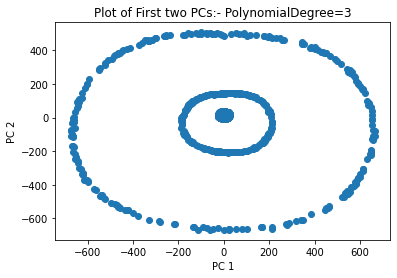

In [19]:
import matplotlib.pyplot as plt
plt.scatter(project[:,0],project[:,1])
plt.plot([0,])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Plot of First two PCs:- PolynomialDegree=3')
plt.show()